In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Read the data from the CSV file
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [3]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_standardized)
    wcss.append(kmeans.inertia_)

C:\Users\MAYURSINGH\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MAYURSINGH\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\MAYURSINGH\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\MAYURSINGH\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\MAYURSINGH\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
C:\Users\MAYURSINGH\a

Text(0, 0.5, 'WCSS')

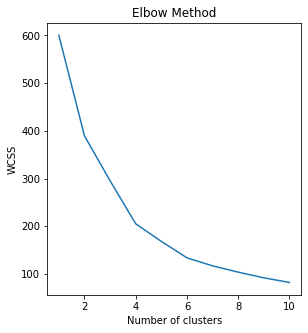

In [4]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares

C:\Users\MAYURSINGH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Age vs Annual Income (Clustered)')

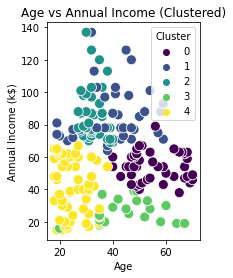

In [5]:
# Apply K-means clustering
k_optimal = 5  # Adjust this based on the elbow method graph
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_standardized)

# Scatter plot for Age vs Annual Income
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Age vs Annual Income (Clustered)')

Text(0.5, 0.92, '3D Scatter Plot')

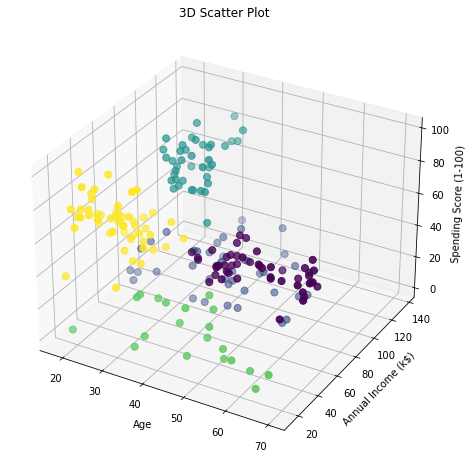

In [6]:
# 3D Scatter plot for Age, Annual Income, and Spending Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot')

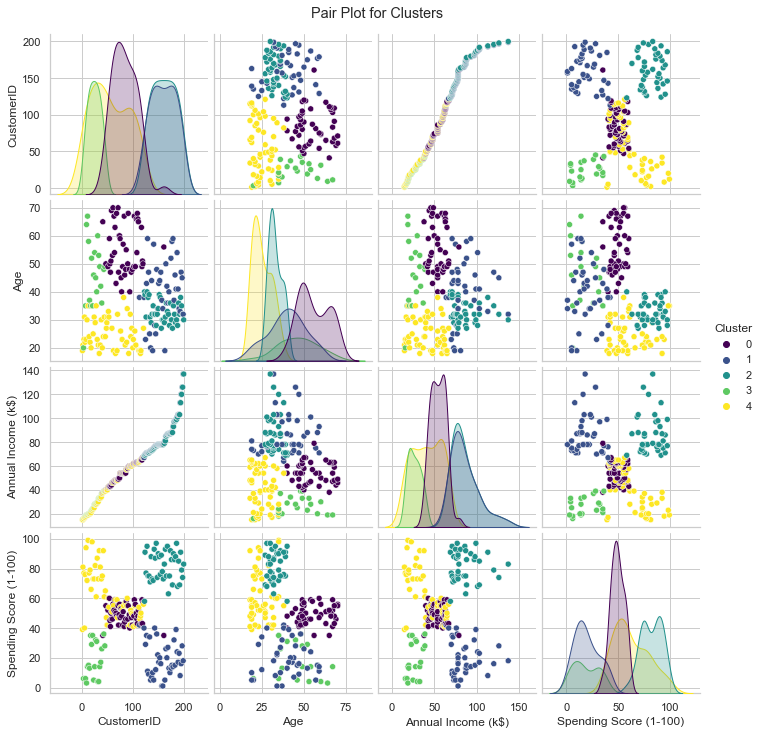

In [7]:
# Pair plot for all features colored by cluster
sns.set(style="whitegrid")
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot for Clusters', y=1.02)

plt.show()